### COP508 Machine Learning Coursework - Part 3: Visualizations & Analysis
Student ID: F515605

Date: January 2026

CODE ATTRIBUTION & SOURCES:

1. **Visualization Libraries:**
    - Matplotlib and seaborn for all plots (standard Python libraries)
    - Documentation: https://matplotlib.org/ and https://seaborn.pydata.org/

2. **Data Visualization:**
    - Sample image display using matplotlib.pyplot.imshow()
    - Class distribution bar charts using seaborn
    - Training curves (loss/accuracy) using matplotlib

3. **Confusion Matrix:**
    - Heatmap visualization from seaborn.heatmap()
    - Side-by-side comparison approach (custom implementation)

4. **Original Contributions:**
    - Dataset exploratory data analysis
    - Custom visualization layouts for report
    - Comparative analysis visualizations across models

NO CODE WAS GENERATED BY AI TOOLS

In [3]:
## Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Local path of dataset
data_dir = pathlib.Path(r'C:\Users\Lenovo\OneDrive\Desktop\Loughborough\Machine Learning Sem 1\COP508_Sea_Animal_dataset\COP508_Sea_Animal_dataset')

image_height = 224
image_width = 224
b_size = 32

print("Reloading Sea animals Dataset")

# A. Loading the Validation Split as it was initially
val_datas_raw = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,           
    image_size=(256, 256),
    batch_size=None
)

# Get Class Names
c_names = val_datas_raw.class_names
print(f"Classes found: {c_names}")

# Preprocessing the dataset to crop the image back to 224,224
def process_val(i, l):
    i = tf.image.resize_with_crop_or_pad(i, image_height, image_width)
    return i, l

# Applying Processing & Batching to dataset
val_datas_f = val_datas_raw.map(process_val, num_parallel_calls=tf.data.AUTOTUNE)
val_datas_f = val_datas_f.batch(b_size).cache().prefetch(tf.data.AUTOTUNE)

# Splitting the validation dataset into 2
val_batches = tf.data.experimental.cardinality(val_datas_f)
test_datas = val_datas_f.take(val_batches // 2)

print(f"Test Data has been Restored: {tf.data.experimental.cardinality(test_datas)} batches")

model_filename = 'COP508_EfficientNetB0.keras' 

print(f"\nLoading model: {model_filename} for sea animals dataset")
try:
    model = tf.keras.models.load_model(model_filename)
    print("Model has been loaded")
except Exception as e:
    print(f"Error loading model: {e}")

Reloading Sea animals Dataset
Found 8778 files belonging to 16 classes.
Using 1755 files for validation.
Classes found: ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Puffers', 'Sea Rays', 'Seahorse', 'Seal', 'Sharks', 'Squid', 'Starfish', 'Whale']
Test Data has been Restored: 27 batches

Loading model: COP508_EfficientNetB0.keras for sea animals dataset
Model has been loaded


### DATASET ANALYSIS: Class Distribution

Visualization approach adapted from:
- seaborn barplot documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html
- Matplotlib examples for dataset exploration

Shows number of images per class in Sea Animals dataset


Found 8778 files belonging to 16 classes.
Counting all images... Getting a total count per class


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16060\1548538331.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


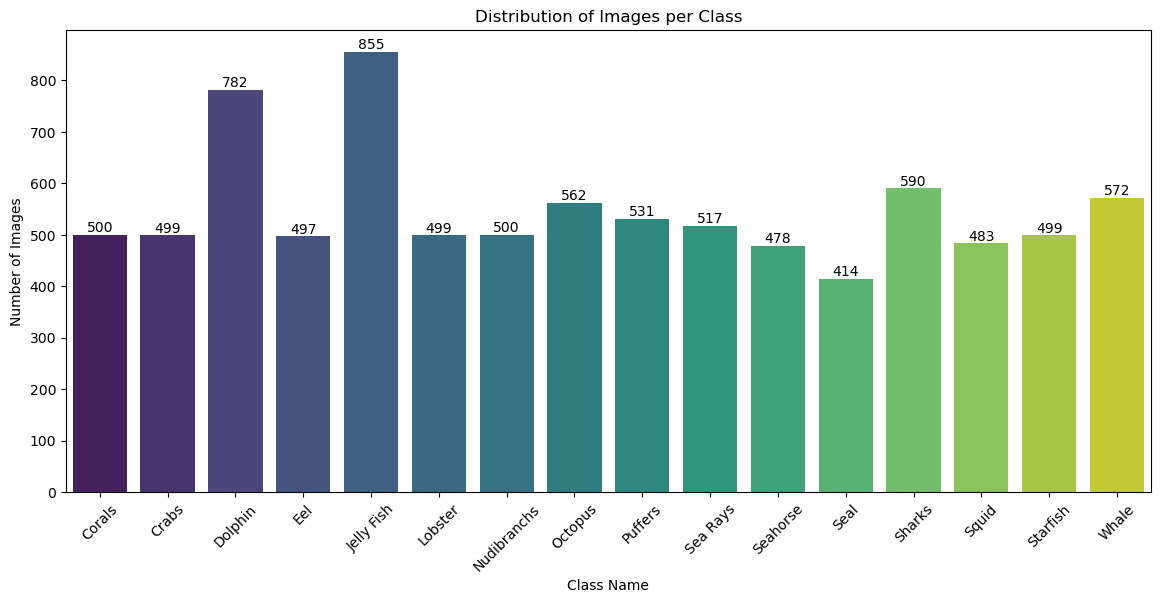

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import tensorflow as tf

# sea animals dataset path
data_dir = pathlib.Path(r'C:\Users\Lenovo\OneDrive\Desktop\Loughborough\Machine Learning Sem 1\COP508_Sea_Animal_dataset\COP508_Sea_Animal_dataset')

# Loading the dataset to count the files
all_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=None,
    image_size=(224, 224), #resizing all images
    shuffle=False
)

class_names = all_ds.class_names
counts = dict.fromkeys(class_names, 0)

print("Counting all images... Getting a total count per class")
#looping through the dataset to count the images per class
for image, label in all_ds:
    counts[class_names[label]] += 1

plt.figure(figsize=(14, 6))

ax = sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=45)
plt.title('Distribution of Images per Class')
plt.ylabel('Number of Images')
plt.xlabel('Class Name')
plt.show()

### FAILURE ANALYSIS: Misclassification Detection

Failure case analysis concept from:
- Standard ML debugging practices
- Image display adapted from Lab 5 (Fashion MNIST visualization)

Custom logic: It Iterates through the test dataset to find out specific shark to dolphin misclassification


Checking for a misclassified Shark
Found a misclassification!


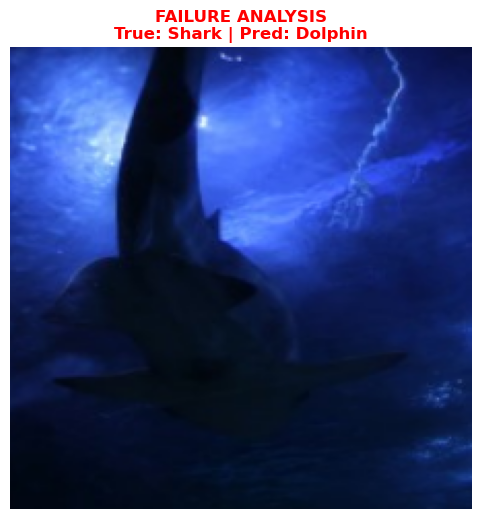

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os  

s_index = 12
d_index = 2

print("Checking for a misclassified Shark")
misclass=False
for i, l in test_datas.unbatch():
    i_batch = tf.expand_dims(i, 0)
    
    p_probs = model.predict(i_batch, verbose=0)
    p_index = np.argmax(p_probs)
    
    #Checking if we called a shark a dolphin
    if int(l) == s_index and p_index == d_index:
        
        #Plotting the failure case
        print("Found a misclassification!")
        misclass = True
        plt.figure(figsize=(6, 6))
        img_to_show = i.numpy().astype("uint8")
        plt.imshow(img_to_show)
        
        # Creating a proper title
        confidence = p_probs[0][d_index] * 100
        plt.title(f"FAILURE ANALYSIS\nTrue: Shark | Pred: Dolphin", 
                  fontsize=12, color='red', fontweight='bold')
        plt.axis("off")
        # Downloading the image
        downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")
        save_filename = os.path.join(downloads_path, "shark_misclassification.png")
        
        # Saving the figure
        plt.savefig(save_filename, bbox_inches='tight', dpi=300)
        
        plt.show()
        break
if not misclass:
    print("No misclassification Found")